In [1]:
#Imports
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
def cpptrajOut(path,filename):
    import numpy as np
    stdout = open(path+filename)
    for line in stdout:
        if 'Avg. throughput' in line:
            throughput = np.float(line.split()[3])
        elif 'Init' in line:
            init = np.float(line.split()[3])
        elif 'Trajectory Process' in line:
            trj_proc = np.float(line.split()[4])
        elif 'Action Post' in line:
            action_post = np.float(line.split()[4])
        elif 'TIME' in line and 'Analysis' in line:
            analysis = np.float(line.split()[3])
        elif 'Data File Write' in line:
            data_write = np.float(line.split()[5])
        elif 'Other' in line:
            other = np.float(line.split()[3])
        elif 'Run Total' in line:
            run_total= np.float(line.split()[3])
        elif 'Total execution time:' in line:
            time_ex = np.float(line.split()[4])
        elif 'Complete Report Data' in line:
            remora_folder_tmp=line.split()[4]
            remora_folder = remora_folder_tmp.split('/')[-1]
            
    lines=0
    rd_sum=0
    home_rate_file = open(path+remora_folder+'/IO/lustre_home1_rate.txt')
    for line in home_rate_file:
        if 'TIMESTAMP' not in line:
            rd_sum+=np.float(line.split()[2])
            lines+=1
    homeRD = np.divide(rd_sum,lines)
        
    lines=0
    rd_sum=0
    work_rate_file = open(path+remora_folder+'/IO/lustre_work_rate.txt')
    for line in work_rate_file:
        if 'TIMESTAMP' not in line:
            rd_sum+=np.float(line.split()[2])
            lines+=1
    workRD = np.divide(rd_sum,lines)
        
    lines=0
    rd_sum=0
    scratch_rate_file = open(path+remora_folder+'/IO/lustre_scratch_rate.txt') 
    for line in scratch_rate_file:
        if 'TIMESTAMP' not in line:
            rd_sum+=np.float(line.split()[2])
            lines+=1
    scratchRD = np.divide(rd_sum,lines)
        
    stdout.close()
    home_rate_file.close()
    work_rate_file.close()
    scratch_rate_file.close()
        
    return np.array([throughput,init,trj_proc,action_post,analysis,data_write,other,run_total,time_ex,homeRD,scratchRD,workRD])

def cpptrajRpOut(filename):
    stdout = open(filename)
    for line in stdout:
        if 'Avg. throughput' in line:
            throughput = np.float(line.split()[3])
        elif 'Init' in line:
            init = np.float(line.split()[3])
        elif 'Trajectory Process' in line:
            trj_proc = np.float(line.split()[4])
        elif 'Action Post' in line:
            action_post = np.float(line.split()[4])
        elif 'TIME' in line and 'Analysis' in line:
            analysis = np.float(line.split()[3])
        elif 'Data File Write' in line:
            data_write = np.float(line.split()[5])
        elif 'Other' in line:
            other = np.float(line.split()[3])
        elif 'Run Total' in line:
            run_total= np.float(line.split()[3])
        elif 'Total execution time' in line:
            time_ex = np.float(line.split()[4])
            
    stdout.close()
    
    metrics = pd.DataFrame(np.array([throughput,init,trj_proc,action_post,\
                                     analysis,data_write,other,run_total,time_ex]).reshape(1,9),\
                          columns =['Throughput','Init','TrajProc','ActionPost',\
                                    'Analysis','DataWrite','Other','RunTotal','TimeEx'])
    
    return metrics
            

def sessionToDataFrame(path,session_name,numCUs):
    sessionDataFrame = pd.DataFrame(columns=['CU','Throughput','Init','TrajProc','ActionPost','Analysis','DataWrite','Other','RunTotal','TimeEx'])
    for i in range(0,numCUs):
        unitMetrics = cpptrajRpOut(path+'/'+session_name+'/'+'unit.%06i'%i+'/STDOUT')
        unitMetrics['CU'] = 'unit.%06i'%i
        sessionDataFrame = sessionDataFrame.append(unitMetrics,ignore_index=True)
    
    return sessionDataFrame

# Data Read

In [25]:
#Work FS 1 MPI per Processor, 100 GBs
outputFiles=[['VanillaExecution/RemoraRuns/x2_work_2/1_1/','cpptraj_en_1_1.out'],
             ['VanillaExecution/RemoraRuns/x2_work_2/1_2/','cpptraj_en_1_2.out'],
             ['VanillaExecution/RemoraRuns/x2_work_2/1_3/','cpptraj_en_1_3.out'],
             ['VanillaExecution/RemoraRuns/x2_work_2/2_1/','cpptraj_en_2_1.out'],
             ['VanillaExecution/RemoraRuns/x2_work_2/2_2/','cpptraj_en_2_2.out'],
             ['VanillaExecution/RemoraRuns/x2_work_2/2_3/','cpptraj_en_2_3.out'],
             ['VanillaExecution/RemoraRuns/x2_work_2/4_1/','cpptraj_en_4_1.out'],
             ['VanillaExecution/RemoraRuns/x2_work_2/4_2/','cpptraj_en_4_2.out'],
             ['VanillaExecution/RemoraRuns/x2_work_2/4_3/','cpptraj_en_4_3.out'],
             ['VanillaExecution/RemoraRuns/x2_work_2/8_1/','cpptraj_en_8_1.out'],
             ['VanillaExecution/RemoraRuns/x2_work_2/8_2/','cpptraj_en_8_2.out'],
             ['VanillaExecution/RemoraRuns/x2_work_2/8_3/','cpptraj_en_8_3.out'],
             ['VanillaExecution/RemoraRuns/x2_work_2/16_1/','cpptraj_en_16_1.out'],
             ['VanillaExecution/RemoraRuns/x2_work_2/16_2/','cpptraj_en_16_2.out'],
             ['VanillaExecution/RemoraRuns/x2_work_2/16_3/','cpptraj_en_16_3.out'],
             ['VanillaExecution/RemoraRuns/x2_work_2/32_1/','cpptraj_en_32_1.out'],
             ['VanillaExecution/RemoraRuns/x2_work_2/32_2/','cpptraj_en_32_2.out'],
             ['VanillaExecution/RemoraRuns/x2_work_2/32_3/','cpptraj_en_32_3.out']]

columns=['cores','try','throughput','init',
         'trj_proc','action_post','analysis',
         'data_write','other','run_total',
         'time_ex','homeRD','scratchRD','workRD']

x2_work_2_tmp=pd.DataFrame(columns=columns)

x2_work_2_tmp.loc[0]=np.hstack((np.array([1,1]),cpptrajOut(outputFiles[0][0],outputFiles[0][1])))
x2_work_2_tmp.loc[1]=np.hstack((np.array([1,2]),cpptrajOut(outputFiles[1][0],outputFiles[1][1])))
x2_work_2_tmp.loc[2]=np.hstack((np.array([1,3]),cpptrajOut(outputFiles[2][0],outputFiles[2][1])))
x2_work_2_tmp.loc[3]=np.hstack((np.array([2,1]),cpptrajOut(outputFiles[3][0],outputFiles[3][1])))
x2_work_2_tmp.loc[4]=np.hstack((np.array([2,2]),cpptrajOut(outputFiles[4][0],outputFiles[4][1])))
x2_work_2_tmp.loc[5]=np.hstack((np.array([2,3]),cpptrajOut(outputFiles[5][0],outputFiles[5][1])))
x2_work_2_tmp.loc[6]=np.hstack((np.array([4,1]),cpptrajOut(outputFiles[6][0],outputFiles[6][1])))
x2_work_2_tmp.loc[7]=np.hstack((np.array([4,2]),cpptrajOut(outputFiles[7][0],outputFiles[7][1])))
x2_work_2_tmp.loc[8]=np.hstack((np.array([4,3]),cpptrajOut(outputFiles[8][0],outputFiles[8][1])))
x2_work_2_tmp.loc[9]=np.hstack((np.array([8,1]),cpptrajOut(outputFiles[9][0],outputFiles[9][1])))
x2_work_2_tmp.loc[10]=np.hstack((np.array([8,2]),cpptrajOut(outputFiles[10][0],outputFiles[10][1])))
x2_work_2_tmp.loc[11]=np.hstack((np.array([8,3]),cpptrajOut(outputFiles[11][0],outputFiles[11][1])))
x2_work_2_tmp.loc[12]=np.hstack((np.array([16,1]),cpptrajOut(outputFiles[12][0],outputFiles[12][1])))
x2_work_2_tmp.loc[13]=np.hstack((np.array([16,2]),cpptrajOut(outputFiles[13][0],outputFiles[13][1])))
x2_work_2_tmp.loc[14]=np.hstack((np.array([16,3]),cpptrajOut(outputFiles[14][0],outputFiles[14][1])))
x2_work_2_tmp.loc[15]=np.hstack((np.array([32,1]),cpptrajOut(outputFiles[15][0],outputFiles[15][1])))
x2_work_2_tmp.loc[16]=np.hstack((np.array([32,2]),cpptrajOut(outputFiles[16][0],outputFiles[16][1])))
x2_work_2_tmp.loc[17]=np.hstack((np.array([32,3]),cpptrajOut(outputFiles[17][0],outputFiles[17][1])))

x2_work_2=pd.DataFrame(columns=columns)
x2_work_2.loc[0]=x2_work_2_tmp[0:3].mean()
x2_work_2.loc[1]=x2_work_2_tmp[3:6].mean()
x2_work_2.loc[2]=x2_work_2_tmp[6:9].mean()
x2_work_2.loc[3]=x2_work_2_tmp[9:12].mean()
x2_work_2.loc[4]=x2_work_2_tmp[12:15].mean()
x2_work_2.loc[5]=x2_work_2_tmp[15:18].mean()
x2_work_2.loc[6]=np.zeros(len(columns))
x2_work_2.drop('try', axis=1, inplace=True)

speedup_x2_work_2 = np.array([x2_work_2['run_total'][0]/x2_work_2['run_total'][0],
                              x2_work_2['run_total'][0]/x2_work_2['run_total'][1],
                              x2_work_2['run_total'][0]/x2_work_2['run_total'][2],
                              x2_work_2['run_total'][0]/x2_work_2['run_total'][3],
                              x2_work_2['run_total'][0]/x2_work_2['run_total'][4],
                              x2_work_2['run_total'][0]/x2_work_2['run_total'][5]])

In [26]:
#Scratch FS 1 MPI per Processor, 100 GBs
outputFiles=[['VanillaExecution/RemoraRuns/x2_scratch_2/1_1/','cpptraj_en_1_1.out'],
             ['VanillaExecution/RemoraRuns/x2_scratch_2/1_2/','cpptraj_en_1_2.out'],
             ['VanillaExecution/RemoraRuns/x2_scratch_2/1_3/','cpptraj_en_1_3.out'],
             ['VanillaExecution/RemoraRuns/x2_scratch_2/2_1/','cpptraj_en_2_1.out'],
             ['VanillaExecution/RemoraRuns/x2_scratch_2/2_2/','cpptraj_en_2_2.out'],
             ['VanillaExecution/RemoraRuns/x2_scratch_2/2_3/','cpptraj_en_2_3.out'],
             ['VanillaExecution/RemoraRuns/x2_scratch_2/4_1/','cpptraj_en_4_1.out'],
             ['VanillaExecution/RemoraRuns/x2_scratch_2/4_2/','cpptraj_en_4_2.out'],
             ['VanillaExecution/RemoraRuns/x2_scratch_2/4_3/','cpptraj_en_4_3.out'],
             ['VanillaExecution/RemoraRuns/x2_scratch_2/8_1/','cpptraj_en_8_1.out'],
             ['VanillaExecution/RemoraRuns/x2_scratch_2/8_2/','cpptraj_en_8_2.out'],
             ['VanillaExecution/RemoraRuns/x2_scratch_2/8_3/','cpptraj_en_8_3.out'],
             ['VanillaExecution/RemoraRuns/x2_scratch_2/16_1/','cpptraj_en_16_1.out'],
             ['VanillaExecution/RemoraRuns/x2_scratch_2/16_2/','cpptraj_en_16_2.out'],
             ['VanillaExecution/RemoraRuns/x2_scratch_2/16_3/','cpptraj_en_16_3.out'],
             ['VanillaExecution/RemoraRuns/x2_scratch_2/32_1/','cpptraj_en_32_1.out'],
             ['VanillaExecution/RemoraRuns/x2_scratch_2/32_2/','cpptraj_en_32_2.out'],
             ['VanillaExecution/RemoraRuns/x2_scratch_2/32_3/','cpptraj_en_32_3.out']]

columns=['cores','try','throughput','init',
         'trj_proc','action_post','analysis',
         'data_write','other','run_total',
         'time_ex','homeRD','scratchRD','workRD']

x2_scratch_2_tmp=pd.DataFrame(columns=columns)

x2_scratch_2_tmp.loc[0]=np.hstack((np.array([1,1]),cpptrajOut(outputFiles[0][0],outputFiles[0][1])))
x2_scratch_2_tmp.loc[1]=np.hstack((np.array([1,2]),cpptrajOut(outputFiles[1][0],outputFiles[1][1])))
x2_scratch_2_tmp.loc[2]=np.hstack((np.array([1,3]),cpptrajOut(outputFiles[2][0],outputFiles[2][1])))
x2_scratch_2_tmp.loc[3]=np.hstack((np.array([2,1]),cpptrajOut(outputFiles[3][0],outputFiles[3][1])))
x2_scratch_2_tmp.loc[4]=np.hstack((np.array([2,2]),cpptrajOut(outputFiles[4][0],outputFiles[4][1])))
x2_scratch_2_tmp.loc[5]=np.hstack((np.array([2,3]),cpptrajOut(outputFiles[5][0],outputFiles[5][1])))
x2_scratch_2_tmp.loc[6]=np.hstack((np.array([4,1]),cpptrajOut(outputFiles[6][0],outputFiles[6][1])))
x2_scratch_2_tmp.loc[7]=np.hstack((np.array([4,2]),cpptrajOut(outputFiles[7][0],outputFiles[7][1])))
x2_scratch_2_tmp.loc[8]=np.hstack((np.array([4,3]),cpptrajOut(outputFiles[8][0],outputFiles[8][1])))
x2_scratch_2_tmp.loc[9]=np.hstack((np.array([8,1]),cpptrajOut(outputFiles[9][0],outputFiles[9][1])))
x2_scratch_2_tmp.loc[10]=np.hstack((np.array([8,2]),cpptrajOut(outputFiles[10][0],outputFiles[10][1])))
x2_scratch_2_tmp.loc[11]=np.hstack((np.array([8,3]),cpptrajOut(outputFiles[11][0],outputFiles[11][1])))
x2_scratch_2_tmp.loc[12]=np.hstack((np.array([16,1]),cpptrajOut(outputFiles[12][0],outputFiles[12][1])))
x2_scratch_2_tmp.loc[13]=np.hstack((np.array([16,2]),cpptrajOut(outputFiles[13][0],outputFiles[13][1])))
x2_scratch_2_tmp.loc[14]=np.hstack((np.array([16,3]),cpptrajOut(outputFiles[14][0],outputFiles[14][1])))
x2_scratch_2_tmp.loc[15]=np.hstack((np.array([32,1]),cpptrajOut(outputFiles[15][0],outputFiles[15][1])))
x2_scratch_2_tmp.loc[16]=np.hstack((np.array([32,2]),cpptrajOut(outputFiles[16][0],outputFiles[16][1])))
x2_scratch_2_tmp.loc[17]=np.hstack((np.array([32,3]),cpptrajOut(outputFiles[17][0],outputFiles[17][1])))

x2_scratch_2=pd.DataFrame(columns=columns)
x2_scratch_2.loc[0]=x2_scratch_2_tmp[0:3].mean()
x2_scratch_2.loc[1]=x2_scratch_2_tmp[3:6].mean()
x2_scratch_2.loc[2]=x2_scratch_2_tmp[6:9].mean()
x2_scratch_2.loc[3]=x2_scratch_2_tmp[9:12].mean()
x2_scratch_2.loc[4]=x2_scratch_2_tmp[12:15].mean()
x2_scratch_2.loc[5]=x2_scratch_2_tmp[15:18].mean()
x2_scratch_2.loc[6]=np.zeros(len(columns))
x2_scratch_2.drop('try', axis=1, inplace=True)

speedup_x2_scratch_2 = np.array([x2_scratch_2['run_total'][0]/x2_scratch_2['run_total'][0],
                              x2_scratch_2['run_total'][0]/x2_scratch_2['run_total'][1],
                              x2_scratch_2['run_total'][0]/x2_scratch_2['run_total'][2],
                              x2_scratch_2['run_total'][0]/x2_scratch_2['run_total'][3],
                              x2_scratch_2['run_total'][0]/x2_scratch_2['run_total'][4],
                              x2_scratch_2['run_total'][0]/x2_scratch_2['run_total'][5]])

In [27]:
#Scratch FS 1 MPI per Processor, 100 GBs, with striping
outputFiles=[['VanillaExecution/Striping/x2_scratch/1_1/','cpptraj_en_1_1.out'],
             ['VanillaExecution/Striping/x2_scratch/1_2/','cpptraj_en_1_2.out'],
             ['VanillaExecution/Striping/x2_scratch/1_3/','cpptraj_en_1_3.out'],
             ['VanillaExecution/Striping/x2_scratch/2_1/','cpptraj_en_2_1.out'],
             ['VanillaExecution/Striping/x2_scratch/2_2/','cpptraj_en_2_2.out'],
             ['VanillaExecution/Striping/x2_scratch/2_3/','cpptraj_en_2_3.out'],
             ['VanillaExecution/Striping/x2_scratch/4_1/','cpptraj_en_4_1.out'],
             ['VanillaExecution/Striping/x2_scratch/4_2/','cpptraj_en_4_2.out'],
             ['VanillaExecution/Striping/x2_scratch/4_3/','cpptraj_en_4_3.out'],
             ['VanillaExecution/Striping/x2_scratch/8_1/','cpptraj_en_8_1.out'],
             ['VanillaExecution/Striping/x2_scratch/8_2/','cpptraj_en_8_2.out'],
             ['VanillaExecution/Striping/x2_scratch/8_3/','cpptraj_en_8_3.out'],
             ['VanillaExecution/Striping/x2_scratch/16_1/','cpptraj_en_16_1.out'],
             ['VanillaExecution/Striping/x2_scratch/16_2/','cpptraj_en_16_2.out'],
             ['VanillaExecution/Striping/x2_scratch/16_3/','cpptraj_en_16_3.out'],
             ['VanillaExecution/Striping/x2_scratch/32_1/','cpptraj_en_32_1.out'],
             ['VanillaExecution/Striping/x2_scratch/32_2/','cpptraj_en_32_2.out'],
             ['VanillaExecution/Striping/x2_scratch/32_3/','cpptraj_en_32_3.out']]

columns=['cores','try','throughput','init',
         'trj_proc','action_post','analysis',
         'data_write','other','run_total',
         'time_ex','homeRD','scratchRD','workRD']

x2_scratch_tmp=pd.DataFrame(columns=columns)

x2_scratch_tmp.loc[0]=np.hstack((np.array([1,1]),cpptrajOut(outputFiles[0][0],outputFiles[0][1])))
x2_scratch_tmp.loc[1]=np.hstack((np.array([1,2]),cpptrajOut(outputFiles[1][0],outputFiles[1][1])))
x2_scratch_tmp.loc[2]=np.hstack((np.array([1,3]),cpptrajOut(outputFiles[2][0],outputFiles[2][1])))
x2_scratch_tmp.loc[3]=np.hstack((np.array([2,1]),cpptrajOut(outputFiles[3][0],outputFiles[3][1])))
x2_scratch_tmp.loc[4]=np.hstack((np.array([2,2]),cpptrajOut(outputFiles[4][0],outputFiles[4][1])))
x2_scratch_tmp.loc[5]=np.hstack((np.array([2,3]),cpptrajOut(outputFiles[5][0],outputFiles[5][1])))
x2_scratch_tmp.loc[6]=np.hstack((np.array([4,1]),cpptrajOut(outputFiles[6][0],outputFiles[6][1])))
x2_scratch_tmp.loc[7]=np.hstack((np.array([4,2]),cpptrajOut(outputFiles[7][0],outputFiles[7][1])))
x2_scratch_tmp.loc[8]=np.hstack((np.array([4,3]),cpptrajOut(outputFiles[8][0],outputFiles[8][1])))
x2_scratch_tmp.loc[9]=np.hstack((np.array([8,1]),cpptrajOut(outputFiles[9][0],outputFiles[9][1])))
x2_scratch_tmp.loc[10]=np.hstack((np.array([8,2]),cpptrajOut(outputFiles[10][0],outputFiles[10][1])))
x2_scratch_tmp.loc[11]=np.hstack((np.array([8,3]),cpptrajOut(outputFiles[11][0],outputFiles[11][1])))
x2_scratch_tmp.loc[12]=np.hstack((np.array([16,1]),cpptrajOut(outputFiles[12][0],outputFiles[12][1])))
x2_scratch_tmp.loc[13]=np.hstack((np.array([16,2]),cpptrajOut(outputFiles[13][0],outputFiles[13][1])))
x2_scratch_tmp.loc[14]=np.hstack((np.array([16,3]),cpptrajOut(outputFiles[14][0],outputFiles[14][1])))
x2_scratch_tmp.loc[15]=np.hstack((np.array([32,1]),cpptrajOut(outputFiles[15][0],outputFiles[15][1])))
x2_scratch_tmp.loc[16]=np.hstack((np.array([32,2]),cpptrajOut(outputFiles[16][0],outputFiles[16][1])))
x2_scratch_tmp.loc[17]=np.hstack((np.array([32,3]),cpptrajOut(outputFiles[17][0],outputFiles[17][1])))

x2_scratch=pd.DataFrame(columns=columns)
x2_scratch.loc[0]=x2_scratch_tmp[0:3].mean()
x2_scratch.loc[1]=x2_scratch_tmp[3:6].mean()
x2_scratch.loc[2]=x2_scratch_tmp[6:9].mean()
x2_scratch.loc[3]=x2_scratch_tmp[9:12].mean()
x2_scratch.loc[4]=x2_scratch_tmp[12:15].mean()
x2_scratch.loc[5]=x2_scratch_tmp[15:18].mean()
x2_scratch.loc[6]=np.zeros(len(columns))
x2_scratch.drop('try', axis=1, inplace=True)

speedup_x2_scratch = np.array([x2_scratch['run_total'][0]/x2_scratch['run_total'][0],
                               x2_scratch['run_total'][0]/x2_scratch['run_total'][1],
                               x2_scratch['run_total'][0]/x2_scratch['run_total'][2],
                               x2_scratch['run_total'][0]/x2_scratch['run_total'][3],
                               x2_scratch['run_total'][0]/x2_scratch['run_total'][4],
                               x2_scratch['run_total'][0]/x2_scratch['run_total'][5]])

In [41]:
x2_scratch

,cores,throughput,init,trj_proc,action_post,analysis,data_write,other,run_total,time_ex,homeRD,scratchRD,workRD
0,1.0,394.117967,0.004700,406.322133,0.000000,0.0,0.226133,0.018333,406.571333,407.074900,0.088865,290.385944,0.0
1,2.0,598.224200,0.011700,268.272133,0.000000,0.0,0.191967,0.003500,268.481767,268.784867,0.535304,435.765408,0.0
2,4.0,768.987033,0.014733,208.083100,0.000067,0.0,0.194733,0.003567,208.306967,208.671233,0.808581,549.328661,0.0
3,8.0,766.919600,0.016333,208.653100,0.000100,0.0,0.194533,0.003567,208.907267,209.449000,1.019983,556.163525,0.0
4,16.0,806.231700,0.017167,198.485433,0.000100,0.0,0.195000,0.003500,198.748167,199.955967,1.576760,566.992696,0.0
5,32.0,873.577033,0.020467,183.169267,0.000033,0.0,0.203433,0.003500,183.400100,183.810800,4.803598,703.000660,0.0
6,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0


# Plotting

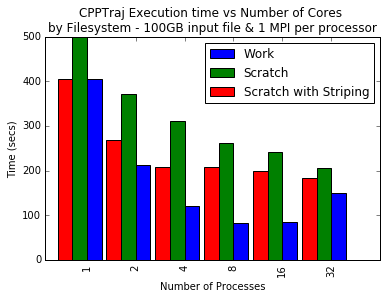

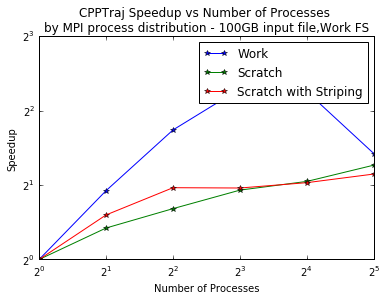

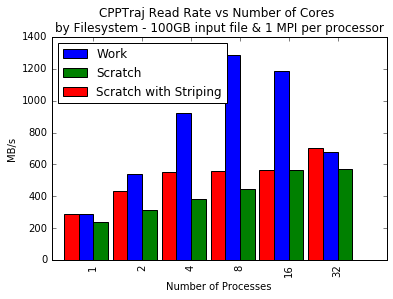

In [38]:
x=np.array([1,2,4,8,16,32,''])
fig,axes=plt.subplots(nrows=1,ncols=1)
plt.title('CPPTraj Execution time vs Number of Cores \nby Filesystem - 100GB input file & 1 MPI per processor')
x2_work_2.plot(kind='bar',ax=axes,position=0,width=0.3,x=x,y='run_total',color='b',legend=True)
x2_scratch_2.plot(kind='bar',position=1,ax=axes,width=0.3,x=x,y='run_total',color='g',legend=True)
x2_scratch.plot(kind='bar',position=2,ax=axes,width=0.3,x=x,y='run_total',color='r',legend=True)
axes.legend(['Work','Scratch','Scratch with Striping'])
plt.ylabel('Time (secs)')
plt.xlabel('Number of Processes')
plt.savefig('cpptrajExecWorkVsScratchStriping100g.png',dpi=800)
plt.savefig('cpptrajExecWorkVsScratchStriping100g.pdf',dpi=800)

plt.figure()
plt.loglog(x[0:-1],speedup_x2_work_2,'b-*',basex=2,basey=2,label='Work')
plt.loglog(x[0:-1],speedup_x2_scratch_2,'g-*',basex=2,basey=2,label='Scratch')
plt.loglog(x[0:-1],speedup_x2_scratch,'r-*',basex=2,basey=2,label='Scratch with Striping')
plt.ylabel('Speedup')
plt.xlabel('Number of Processes')
plt.legend()
plt.title('CPPTraj Speedup vs Number of Processes \nby MPI process distribution - 100GB input file,Work FS')
plt.savefig('cpptrajSpeedWorkVsScratchStriping100g.png',dpi=800)
plt.savefig('cpptrajSpeedWorkVsScratchStriping100g.pdf',dpi=800)

fig,axes=plt.subplots(nrows=1,ncols=1)
plt.title('CPPTraj Read Rate vs Number of Cores \nby Filesystem - 100GB input file & 1 MPI per processor')
x2_work_2.plot(kind='bar',ax=axes,position=1,width=0.3,x=x,y='workRD',color='b',legend=True)
x2_scratch_2.plot(kind='bar',position=0,ax=axes,width=0.3,x=x,y='scratchRD',color='g',legend=True)
x2_scratch.plot(kind='bar',position=2,ax=axes,width=0.3,x=x,y='scratchRD',color='r',legend=True)
axes.legend(['Work','Scratch','Scratch with Striping'],loc='best')
plt.ylabel('MB/s')
plt.xlabel('Number of Processes')
plt.savefig('cpptrajReadWorkVsScratchStriping100g.png',dpi=800)
plt.savefig('cpptrajReadWorkVsScratchStriping100g.pdf',dpi=800)